<a href="https://colab.research.google.com/github/mohamedrafat9/ml_algos/blob/main/fe-diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


dia = pd.read_csv("/content/diabetes.csv")
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
!pip install catboost

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
from sklearn.metrics import f1_score
import lightgbm as lgb
from catboost import CatBoostClassifier

In [4]:
zerocounts = (dia == 0).sum()
print(zerocounts)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [5]:
zero_ratio = (dia == 0).sum() / len(dia)
print(zero_ratio)

Pregnancies                 0.144531
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.651042
dtype: float64


In [6]:
df = dia.copy()
df = df.drop(columns=["Insulin"])
cols = ["Glucose", "BloodPressure", "BMI",'SkinThickness']
df[cols] = df[cols].replace(0, np.nan)
cols_k = {
    "Glucose":3,
    "BloodPressure": 3,
    "SkinThickness":11,
    # "Insulin":19,
    "BMI":3,
}

for col, k in cols_k.items():
    imputer = KNNImputer(n_neighbors=k)
    temp = imputer.fit_transform(df[[col]])
    df[col] = temp

print(df.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:


# df['BMI_Age'] = df['BMI'] * df['Age']
# df['Glucose_Age'] = df['Glucose'] / (df['Age'] + 1)
# df['Pregnancies_Age'] = df['Pregnancies'] * df['Age']
# df['Insulin_Glucose'] = df['Insulin'] / (df['Glucose'] + 1)
# df['Insulin_Age'] = df['Insulin'] / (df['Age'] + 1)
# df['Insulin_Pregnancies'] = df['Insulin'] / (df['Pregnancies'] + 1)
# df['SkinThickness_Age'] = df['SkinThickness'] / (df['Age'] + 1)
# df['SkinThickness_Pregnancies'] = df['SkinThickness'] / (df['Pregnancies'] + 1)
# df['SkinThickness_Glucose'] = df['SkinThickness'] / (df['Glucose'] + 1)
# df['BloodPressure_Age'] = df['BloodPressure'] / (df['Age'] + 1)
# df['BloodPressure_Pregnancies'] = df['BloodPressure'] / (df['Pregnancies'] + 1)
# df['BloodPressure_Glucose'] = df['BloodPressure'] / (df['Glucose'] + 1)

# print(df.head())

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
zerocounts = (df == 0).sum()
print(zerocounts)

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


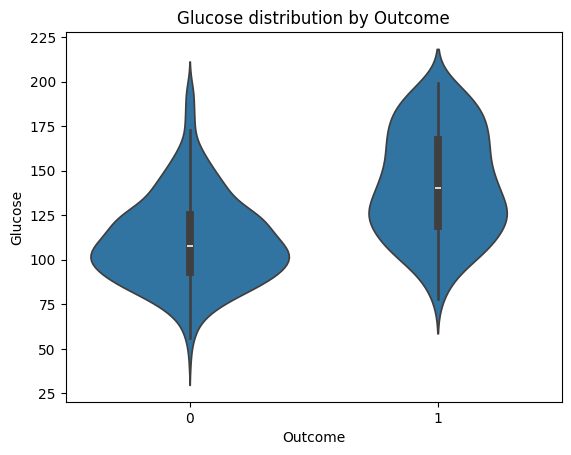

In [10]:
sns.violinplot(data=df, x="Outcome", y="Glucose")
plt.title("Glucose distribution by Outcome")
plt.show()

In [11]:
# cols_k = {
#     "Glucose":3,
#     "Glucose_Age": 3,
#     "BloodPressure": 3,
#     "SkinThickness":5,
#     "Insulin":13,
#     "Insulin_Glucose":13,
#     "BMI":1,
#     "BMI_Age":1
# }

# for col, k in cols_k.items():
#     imputer = KNNImputer(n_neighbors=k)
#     temp = imputer.fit_transform(df[[col]])
#     df[col] = temp

# print(df.isna().sum())

In [12]:
x = df.drop("Outcome", axis=1)
y = df["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42, stratify=y)

### #Random Forest

In [13]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
f1 = f1_score(y_test, y_pred, average="weighted")
print(f1)
print(classification_report(y_test,y_pred))

0.7364029459974635
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       100
           1       0.65      0.57      0.61        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.74      0.74       154



# Decision Tree

0.7525309468639783
              precision    recall  f1-score   support

           0       0.90      0.69      0.78       100
           1       0.60      0.85      0.70        54

    accuracy                           0.75       154
   macro avg       0.75      0.77      0.74       154
weighted avg       0.79      0.75      0.75       154



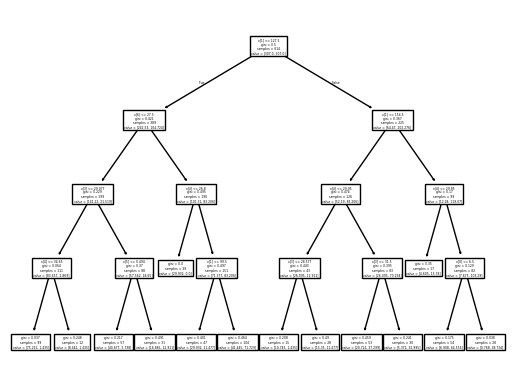

In [19]:
dt=DecisionTreeClassifier(
                            criterion='gini',
                            max_depth=4,
                            min_samples_split=4,
                            min_samples_leaf=12,
                            max_features=None,
                            class_weight='balanced',
                            random_state=42
                        )
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(f1_score(y_test, y_pred, average="weighted"))
print(classification_report(y_test, y_pred))
tree.plot_tree(dt)
plt.show()
# 0.78

In [20]:
for depth in range(1,20):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(x_train, y_train)
    y_pred = dt.predict(x_test)
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(f"max_depth={depth}, F1={f1:.4f}")

max_depth=1, F1=0.6538
max_depth=2, F1=0.6538
max_depth=3, F1=0.6442
max_depth=4, F1=0.7862
max_depth=5, F1=0.7755
max_depth=6, F1=0.7216
max_depth=7, F1=0.7332
max_depth=8, F1=0.7000
max_depth=9, F1=0.6838
max_depth=10, F1=0.6509
max_depth=11, F1=0.6425
max_depth=12, F1=0.6372
max_depth=13, F1=0.6508
max_depth=14, F1=0.6428
max_depth=15, F1=0.6428
max_depth=16, F1=0.6428
max_depth=17, F1=0.6428
max_depth=18, F1=0.6428
max_depth=19, F1=0.6428


# XG Boost

In [16]:
xg_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=3,
    min_child_weight= 5,
    learning_rate=0.01,
    subsample=1,
    gamma=0.1,
    colsample_bytree=1,
)

xg_model.fit(x_train, y_train)


y_pred = xg_model.predict(x_test)


print(f1_score(y_test, y_pred, average="weighted"))
print(classification_report(y_test, y_pred))

0.7313771134525852
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       100
           1       0.67      0.52      0.58        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



# cat boost

In [17]:
from catboost import CatBoostClassifier


cat_model = CatBoostClassifier(
    iterations=300,
    depth=5,
    learning_rate=0.05,
    verbose=0,
    random_state=42
)

cat_model.fit(x_train, y_train)


y_pred_cat = cat_model.predict(x_test)
print("CatBoost Weighted F1-score:", f1_score(y_test, y_pred_cat, average="weighted"))
print(classification_report(y_test, y_pred_cat))

CatBoost Weighted F1-score: 0.7378112083994437
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       100
           1       0.64      0.59      0.62        54

    accuracy                           0.74       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



## LGB

In [18]:
import lightgbm as lgb
from sklearn.metrics import f1_score, classification_report

lgb_model = lgb.LGBMClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.05,
    random_state=42,
    verbose=-1
)

lgb_model.fit(x_train, y_train)


y_pred_lgb = lgb_model.predict(x_test)
print("LightGBM Weighted F1-score:", f1_score(y_test, y_pred_lgb, average="weighted"))
print(classification_report(y_test, y_pred_lgb))

LightGBM Weighted F1-score: 0.7364029459974635
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       100
           1       0.65      0.57      0.61        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.74      0.74       154

